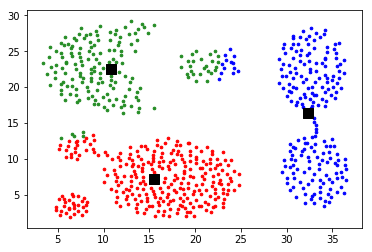

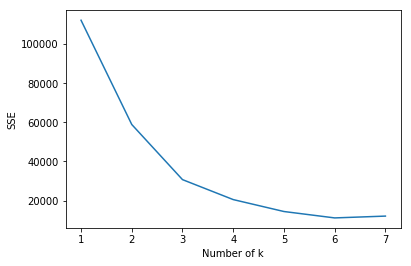

In [12]:
# import numpy as np
from copy import deepcopy
from matplotlib import pyplot as plt

def euclid(data, centroid, ax=1):
    return np.linalg.norm(data - centroid, axis=ax)

def optimal_k(data):
    # mencari daftar sse
    sse = []
    for k in range(1,8):
        centroid = initCentroid(data,k)
        clusters = clustering(data,centroid,k)
        sumtoCluster = 0
        for i in range(k):
            for j in range(len(data)):
                if clusters[j] == i:
                    # Euclidean Distance untuk sumtoCluster
                    sumtoCluster += (abs((data[j,0]-centroid[i][0])**2) +
                                     abs((data[j,1]-centroid[i][1])**2))
        sse.append([k,sumtoCluster])
    
    # Plot grafik kluster
    sseKey = [sse[j][0] for j in range(len(sse))]
    sseValue = [sse[j][1] for j in range(len(sse))]
    plt.figure()
    plt.plot(sseKey, sseValue)
    plt.xlabel("Number of k")
    plt.ylabel("SSE")
    plt.show()
    
    # mencari k optimal dengan patokan jika nilai yang berkurang lebih sama dengan 30% dari turunnya sse pertama, dianggap turun drastis dan k optimal
    k_optimal = 2
    first_drop_sse = (sse[0][1]-sse[1][1])
    for k in range(1,5):
        if (sse[k][1]-sse[k+1][1] >= (first_drop_sse*0.3)):
            k_optimal = sse[k+1][0]
    return k_optimal

def initCentroid(data,k):
    x_centroid = np.random.randint(0, np.max(data), size=k)
    y_centroid = np.random.randint(0, np.max(data), size=k)
    centroid = np.array(list(zip(x_centroid, y_centroid)), dtype=np.float32)
    return centroid

def clustering(data, centroid, k):
    old_centroid = np.zeros(centroid.shape)
    centers = np.zeros(len(data))
    sameLocation = euclid(centroid, old_centroid, None)
    # dinyatakan lokasi sama jika samelocation = 0
    while sameLocation != 0:
        for i in range(len(data)):
            distances = euclid(data[i], centroid)
            center = np.argmin(distances)
            centers[i] = center
        old_centroid = deepcopy(centroid)
        for i in range(k):
            titik = [data[j] for j in range(len(data)) if centers[j] == i]
            centroid[i] = np.mean(titik, axis=0)
        sameLocation = euclid(centroid, old_centroid, None)
    return centers


# Load data dan jadikan array
data = np.loadtxt('K-Means/TrainsetTugas2.txt')
x_data = data[:,0]
y_data = data[:,1]

k= optimal_k(data)

# koordinat X,Y centroid data random
centroid = initCentroid(data,k)

# clustering
clusters = clustering(data,centroid,k)
    
# Buat Plot
colors = ['blue', 'forestgreen', 'red', 'darkgoldenrod', 'purple', 'cyan']
fig, ax = plt.subplots()
for i in range(k):
        titik = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
        ax.scatter(titik[:, 0], titik[:, 1], s=7, c=colors[i])
ax.scatter(centroid[:, 0], centroid[:, 1], marker='s', s=100, c='black')
         
# simpan result ke txt
result = []
result = np.column_stack((data, clusters))
np.savetxt('K-Means/result_trains.txt', result, newline='\r\n', fmt="%s\t%s\t%i")